# Visualization for the relationship between seasons and the count of cases

In [78]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"

## Import data

In [79]:
data = pd.read_csv('data-by-day.csv')
data.head()

,date_of_interest,CASE_COUNT,PROBABLE_CASE_COUNT,HOSPITALIZED_COUNT,DEATH_COUNT,PROBABLE_DEATH_COUNT,CASE_COUNT_7DAY_AVG,ALL_CASE_COUNT_7DAY_AVG,HOSP_COUNT_7DAY_AVG,DEATH_COUNT_7DAY_AVG,...,SI_HOSPITALIZED_COUNT,SI_DEATH_COUNT,SI_PROBABLE_DEATH_COUNT,SI_CASE_COUNT_7DAY_AVG,SI_PROBABLE_CASE_COUNT_7DAY_AVG,SI_ALL_CASE_COUNT_7DAY_AVG,SI_HOSPITALIZED_COUNT_7DAY_AVG,SI_DEATH_COUNT_7DAY_AVG,SI_ALL_DEATH_COUNT_7DAY_AVG,INCOMPLETE
0,02/29/2020,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,03/01/2020,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,03/02/2020,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,03/03/2020,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,03/04/2020,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
data.dtypes

date_of_interest                  object
CASE_COUNT                         int64
PROBABLE_CASE_COUNT                int64
HOSPITALIZED_COUNT                 int64
DEATH_COUNT                        int64
                                   ...  
SI_ALL_CASE_COUNT_7DAY_AVG         int64
SI_HOSPITALIZED_COUNT_7DAY_AVG     int64
SI_DEATH_COUNT_7DAY_AVG            int64
SI_ALL_DEATH_COUNT_7DAY_AVG        int64
INCOMPLETE                         int64
Length: 67, dtype: object

## Change date from object type to datetime type

In [81]:
data['date_of_interest'] =data['date_of_interest'].astype('datetime64[ns]')
data.head()
data.dtypes

date_of_interest                  datetime64[ns]
CASE_COUNT                                 int64
PROBABLE_CASE_COUNT                        int64
HOSPITALIZED_COUNT                         int64
DEATH_COUNT                                int64
                                       ...      
SI_ALL_CASE_COUNT_7DAY_AVG                 int64
SI_HOSPITALIZED_COUNT_7DAY_AVG             int64
SI_DEATH_COUNT_7DAY_AVG                    int64
SI_ALL_DEATH_COUNT_7DAY_AVG                int64
INCOMPLETE                                 int64
Length: 67, dtype: object

## Define function to get the sum of cases for each season

In [82]:
# get the sum of cases in specific date(spring, summer, fall, winter)
def getSum(data)-> list: 
    cnt_2020_spr, cnt_2020_summ, cnt_2020_fall, cnt_2020_win = 0, 0, 0, 0
    cnt_2021_spr, cnt_2021_summ, cnt_2021_fall, cnt_2021_win = 0, 0, 0, 0
    cnt_2022_spr, cnt_2022_summ, cnt_2022_fall, cnt_2022_win = 0, 0, 0, 0
    for index, row in data.iterrows():
        if pd.to_datetime("2020-03-01").date() <= row['date_of_interest'] <= pd.to_datetime("2020-05-31").date():
            cnt_2020_spr += row['CASE_COUNT']
        elif pd.to_datetime("2021-03-01").date() <= row['date_of_interest'] <= pd.to_datetime("2021-05-31").date():
            cnt_2021_spr += row['CASE_COUNT']
        elif pd.to_datetime("2022-03-01").date() <= row['date_of_interest'] <= pd.to_datetime("2022-05-31").date():
            cnt_2022_spr += row['CASE_COUNT']
        elif pd.to_datetime("2020-06-01").date() <= row['date_of_interest'] <= pd.to_datetime("2020-08-31").date():
            cnt_2020_summ += row['CASE_COUNT']
        elif pd.to_datetime("2021-06-01").date() <= row['date_of_interest'] <= pd.to_datetime("2021-08-31").date():
            cnt_2021_summ += row['CASE_COUNT']
        elif pd.to_datetime("2022-06-01").date() <= row['date_of_interest'] <= pd.to_datetime("2022-08-31").date():
            cnt_2022_summ += row['CASE_COUNT']
        elif pd.to_datetime("2020-09-01").date() <= row['date_of_interest'] <= pd.to_datetime("2020-11-30").date():
            cnt_2020_fall += row['CASE_COUNT'] 
        elif pd.to_datetime("2021-09-01").date() <= row['date_of_interest'] <= pd.to_datetime("2021-11-30").date():
            cnt_2021_fall += row['CASE_COUNT'] 
        elif pd.to_datetime("2022-09-01").date() <= row['date_of_interest'] <= pd.to_datetime("2022-11-30").date():
            cnt_2022_fall += row['CASE_COUNT'] 
        elif pd.to_datetime("2020-12-01").date() <= row['date_of_interest'] <= pd.to_datetime("2021-02-28").date():
            cnt_2020_win += row['CASE_COUNT']
        elif pd.to_datetime("2021-12-01").date() <= row['date_of_interest'] <= pd.to_datetime("2022-02-28").date():
            cnt_2021_win += row['CASE_COUNT']
        elif pd.to_datetime("2022-12-01").date() <= row['date_of_interest'] <= pd.to_datetime("2023-02-28").date():
            cnt_2022_win += row['CASE_COUNT']
        
    return [cnt_2020_spr, cnt_2020_summ, cnt_2020_fall, cnt_2020_win, 
            cnt_2021_spr, cnt_2021_summ, cnt_2021_fall, cnt_2021_win,
            cnt_2022_spr, cnt_2022_summ, cnt_2022_fall, cnt_2022_win]

result = getSum(data)
result

[202892,
 28076,
 72781,
 322887,
 159944,
 70557,
 96359,
 993774,
 186697,
 249970,
 163608,
 5296]

## Visualization1: The count of cases for every season in every year (2020 - 2022)

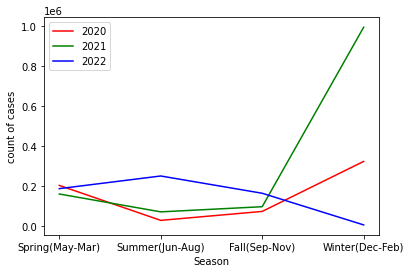

In [84]:
x = ['Spring(May-Mar)', 'Summer(Jun-Aug)', 'Fall(Sep-Nov)', 'Winter(Dec-Feb)']
y1 = [result[0], result[1], result[2], result[3]]
y2 = [result[4], result[5], result[6], result[7]]
y3 = [result[8], result[9], result[10], result[11]]
plt.plot(x, y1, color='r', label = '2020')
plt.plot(x, y2, color='g', label = '2021')
plt.plot(x, y3, color='b', label = '2022')
plt.legend()  # show 图例legend
plt.xlabel('Season')
plt.ylabel('count of cases')
plt.show()

## Visualization2: The total count for three years(2020 - 2022) of cases for every season

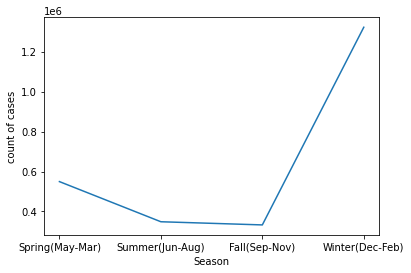

In [76]:
x = ['Spring(May-Mar)', 'Summer(Jun-Aug)', 'Fall(Sep-Nov)', 'Winter(Dec-Feb)']
spr = result[0]+result[4]+result[8]
summ = result[1]+result[5]+result[9]
fall = result[2]+result[6]+result[10]
win = result[3]+result[7]+result[11]
y = [spr, summ, fall, win]
plt.plot(x, y)
plt.xlabel('Season')
plt.ylabel('count of cases')
plt.show()